In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from matplotlib import pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from plotly import express as px
import re
import seaborn as sns
import string
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import warnings
import time

In [2]:
import pandas as pd
import torch
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings

In [3]:
nord=pd.read_csv("/content/nordrev (1).csv")

In [4]:
nord.head()

,Unnamed: 0,Unnamed: 0.1,product,title,rating,body,review,lang,review_translate
0,0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...,Other,good phone camera quality all overall good but...
1,1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...,Other,good product over all good product. but i want...
2,2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...,Other,oneplus so far i'm enjoying it. i hope this wi...
3,3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...,Other,ok phone is good but camera is not that good a...
4,4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...,Other,not upto mark battery drain very fast ..camera...


# **PREPROCESSING**

In [5]:
!pip install pyspellchecker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.9 MB/s eta 0:00:00


In [6]:
from spellchecker import SpellChecker
 
def spellcorrection(text):
  spell = SpellChecker()
  a = spell.correction(text)
  return a

In [7]:
!pip uninstall gensim


Found existing installation: gensim 3.6.0
Uninstalling gensim-3.6.0:
  Would remove:
    /usr/local/lib/python3.8/dist-packages/gensim-3.6.0.dist-info/*
    /usr/local/lib/python3.8/dist-packages/gensim/*
Proceed (Y/n)? Y
  Successfully uninstalled gensim-3.6.0


In [8]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 31.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 KB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for fst-pso: filename=fst_pso-1.8.1-py3-none-any.whl size=20443 sha256=4d1b02ab9c51a14239d1c32a86f27d168ad708e3e1fe7cb2dab7e525b54b809a
  Stored in directory: /root/.cache/pip/wheels/6a/65/c4/d27eeee9ba3fc150a0dae150519591103b9e0dbffde3ae77dc
  Created wheel for miniful: filename=miniful-0.0.6-py3-none-any.whl size=3530 sha256=d307bc120070a08336c447bbd8db86a7f8ec785fd871e0274bac0ba49ea69203
  Stored in directory: /root/.cache/pip/wheels/ba/d9/a0/ddd93af16d5855dd9bad417623e70948fdac119d1d34fb17c8
Successfully built fst-pso miniful


In [9]:
nord['rev']= nord['review_translate'].apply(spellcorrection)

In [10]:
nord.head()

,Unnamed: 0,Unnamed: 0.1,product,title,rating,body,review,lang,review_translate,rev
0,0,0,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good phone,4,Camera quality all overall good but only nagat...,good phone camera quality all overall good but...,Other,good phone camera quality all overall good but...,good phone camera quality all overall good but...
1,1,1,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Good product,4,Over all good product. But I want to upgrade t...,good product over all good product. but i want...,Other,good product over all good product. but i want...,good product over all good product. but i want...
2,2,2,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Oneplus,4,So far I'm enjoying it. I hope this will be a ...,oneplus so far i'm enjoying it. i hope this wi...,Other,oneplus so far i'm enjoying it. i hope this wi...,oneplus so far i'm enjoying it. i hope this wi...
3,3,3,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Ok,4,Phone is good but camera is not that good acco...,ok phone is good but camera is not that good a...,Other,ok phone is good but camera is not that good a...,ok phone is good but camera is not that good a...
4,4,4,"OnePlus Nord 2T 5G (Jade Fog, 8GB RAM, 128GB S...",Not upto mark,4,Battery drain very fast ..camera quality is no...,not upto mark battery drain very fast ..camera...,Other,not upto mark battery drain very fast ..camera...,not upto mark battery drain very fast ..camera...


In [11]:
def word_tokenizer(text):
    text = str(text).lower()
    text = str(text).split()

    return text

In [12]:
!pip install spacy 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [13]:
import spacy

sp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [14]:
def lemmatization(text):
    text = " ".join(text)
    token = sp(text)

    text = [word.lemma_ for word in token]
    return text

In [15]:
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer

stemmer = PorterStemmer()

def stemming(text):

    text = [stemmer.stem(word) for word in text]
    return text



In [16]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords

en_stopwords = set(stopwords.words('english'))

def remove_stopwords(text):
    text = [word for word in text if word not in en_stopwords]
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
def preprocessing(text):
    text = word_tokenizer(text)
    text = stemming(text)
    text = lemmatization(text)
    text = remove_stopwords(text)
    text = " ".join(text)

    return text

# **Data Augmentation**

In [18]:
df_temp = nord.copy()

In [19]:
def label(y):
    if y == 5:
      return 1
    elif y == 4 :
      return 1
    else:
      return 0
    
from tqdm import tqdm

tqdm.pandas()

df_temp['y'] = df_temp['rating'].apply(label)

In [20]:
df_temp = df_temp[['review', 'y', 'rating']]

In [21]:
df_temp.head()

,review,y,rating
0,good phone camera quality all overall good but...,1,4
1,good product over all good product. but i want...,1,4
2,oneplus so far i'm enjoying it. i hope this wi...,1,4
3,ok phone is good but camera is not that good a...,1,4
4,not upto mark battery drain very fast ..camera...,1,4


In [22]:
df_temp.y.value_counts()

1    1152
0     446
Name: y, dtype: int64

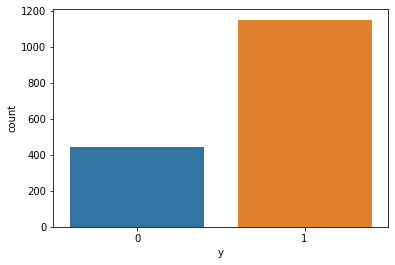

In [23]:
import seaborn as sns

sns.countplot(x = "y", data = df_temp)
plt.show()

In [24]:
df_temp2 = df_temp[(df_temp['rating'] == 5)]

In [25]:
positive = list(df_temp2[(df_temp2['review'].str.len() > 100) & (df_temp2['review'].str.len() < 350)]['review'])
len(positive)

220

In [26]:
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 KB 8.5 MB/s eta 0:00:00


In [27]:
import nlpaug.augmenter.word as naw

In [28]:
positive[41:49]

['only smartphone with ois camera in this budget the media could not be loaded.\n                \n\n\n\n super performance best oxygen os version camera quality awesome with ois but there is cost cutting in display quality after all budget wise good',
 'a great phone in this range. writing review after    days use.liked the phone so far..camera is good ans so is battery life.it charges very quick in almost    mins.good experience overall.go for it.',
 "good camera  good performance  battery issues again  you can't have everything in a phone just perfect and tailor made. camera quality and specially the night mode is just amazing. ui is smooth. overall worth the money.",
 "camra quality is awesome. camra quality is awesome. good  batery back up with normal use.. display is also very good. can't notice any lap.",
 'very nice phones after one month review phone is very good but should be     hz refresh rate at this price. and battery should be more lasting but charge very fast     minute

In [29]:
aug = naw.AntonymAug(name='Antonym_Aug', aug_min=1, aug_max=10, aug_p=0.3, lang='eng', stopwords=en_stopwords, tokenizer=None, 
                     reverse_tokenizer=None, stopwords_regex=None, verbose=0)
 
aug_negative = aug.augment(positive)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [30]:
len(aug_negative)

220

In [31]:
aug_negative[41:49]

['only smartphone with ois camera in this budget the media could not be loaded. super performance bad oxygen os version camera quality awesome with ois but there is cost switch on in display quality after all budget wise bad',
 'a great phone in this range. writing review after days use. dislike the phone so far. . camera is evil ans so is battery life. it discharge very quick in almost mins. bad experience overall. malfunction for it.',
 "evil camera evil performance battery issues again you can ' t have everything in a phone just imperfect and tailor unmake. camera quality and specially the night mode is just amazing. ui is rough. overall worth the money.",
 "camra quality is awesome. camra quality is awesome. bad batery ahead up with abnormal use. . display is also very bad. can ' t notice any lap.",
 'very nasty phones after one month review phone is very bad but should be hz refresh rate at this price. and battery should be more impermanent but charge very fast minutes',
 'mobile 

In [32]:
df_negative = pd.DataFrame({"review" : aug_negative, 'y' : [0]*len(aug_negative)})

In [33]:
df_positive = pd.DataFrame({"review" : positive, 'y' : [1]*len(positive)})

In [34]:
df_temp = pd.concat([df_negative, df_positive]).sample(frac = 1, random_state = 11).reset_index(drop=True)

In [35]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  440 non-null    object
 1   y       440 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ KB


In [36]:
df_temp.head()

,review,y
0,awesome product was a bit skeptical while stop...,0
1,fantastic phone everything works perfectly t...,1
2,good phone under k fingerprint work very wel...,1
3,it ' s awesome value for money super powerfull...,0
4,that ' s awesome wonderful phone that ' s grea...,0


In [37]:
df = df_temp

In [38]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review'] = df['review'].progress_map(preprocessing)

100%|██████████| 440/440 [00:08<00:00, 54.36it/s]


In [39]:
df.head()

,review,y,clean_review
0,awesome product was a bit skeptical while stop...,0,awesom product wa bit skeptic stop back thi I ...
1,fantastic phone everything works perfectly t...,1,fantast phone everyth work perfectli respon pe...
2,good phone under k fingerprint work very wel...,1,good phone k fingerprint work veri well . batt...
3,it ' s awesome value for money super powerfull...,0,' awesom valu money super powerful experiencec...
4,that ' s awesome wonderful phone that ' s grea...,0,' awesom wonder phone ' great wonder phone I l...


In [40]:
reviews = df.clean_review.values.tolist()

In [41]:
from tqdm import tqdm

tqdm.pandas()

df['clean_review2'] = df['clean_review'].progress_map(word_tokenizer)

100%|██████████| 440/440 [00:00<00:00, 27725.52it/s]


In [42]:
df.head()

,review,y,clean_review,clean_review2
0,awesome product was a bit skeptical while stop...,0,awesom product wa bit skeptic stop back thi I ...,"[awesom, product, wa, bit, skeptic, stop, back..."
1,fantastic phone everything works perfectly t...,1,fantast phone everyth work perfectli respon pe...,"[fantast, phone, everyth, work, perfectli, res..."
2,good phone under k fingerprint work very wel...,1,good phone k fingerprint work veri well . batt...,"[good, phone, k, fingerprint, work, veri, well..."
3,it ' s awesome value for money super powerfull...,0,' awesom valu money super powerful experiencec...,"[', awesom, valu, money, super, powerful, expe..."
4,that ' s awesome wonderful phone that ' s grea...,0,' awesom wonder phone ' great wonder phone I l...,"[', awesom, wonder, phone, ', great, wonder, p..."


## **Latent Dirichlet Allocation (LDA)**

In [43]:
data_words = df['clean_review2'].values.tolist()
len(data_words)

440

In [44]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
print(corpus[:1][0][:30])


[(0, 1), (1, 3), (2, 2), (3, 1), (4, 3), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1)]


In [45]:
from gensim.models import LdaMulticore
from gensim.models import LdaModel
from pprint import pprint

# number of topics
num_topics = 10
# Build LDA model
lda_model = LdaMulticore(corpus=corpus, id2word=id2word,
                     num_topics=num_topics, iterations=400)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.026*"perform" + 0.026*"veri" + 0.020*"camera" + 0.020*"\'" + 0.020*"gud" '
  '+ 0.017*"display" + 0.017*"oneplu" + 0.017*"batteri" + 0.013*"." + '
  '0.013*"speed"'),
 (1,
  '0.045*"camera" + 0.036*"." + 0.031*"thi" + 0.028*"good" + 0.020*"phone" + '
  '0.017*"wa" + 0.017*"qualiti" + 0.014*"perform" + 0.011*"back" + '
  '0.011*"make"'),
 (2,
  '0.021*"batteri" + 0.017*"day" + 0.017*"bad" + 0.017*"one" + 0.013*"." + '
  '0.013*"veri" + 0.013*"product" + 0.013*"k" + 0.013*"\'" + 0.008*"i"'),
 (3,
  '0.064*"." + 0.033*"camera" + 0.022*"thi" + 0.021*"phone" + 0.020*"batteri" '
  '+ 0.018*"oneplu" + 0.018*"i" + 0.016*"super" + 0.016*"fast" + 0.015*"bad"'),
 (4,
  '0.087*"." + 0.046*"good" + 0.028*"batteri" + 0.025*"camera" + 0.019*".." + '
  '0.016*"veri" + 0.015*"phone" + 0.014*"fast" + 0.013*"look" + 0.012*"thi"'),
 (5,
  '0.033*"phone" + 0.030*"thi" + 0.026*"." + 0.019*"camera" + 0.016*"one" + '
  '0.016*"i" + 0.016*"good" + 0.015*"awesom" + 0.013*"veri" + 0.013*"hai"'),
 (6,
 

In [46]:
%%time
import gensim
from gensim.models.fasttext import FastText as FT_gensim

def gen_words(data_words):
    yield data_words   

fasttext_model = FT_gensim(data_words, vector_size= 100, window=5, min_count=5, workers=4,sg=1)


CPU times: user 1.55 s, sys: 419 ms, total: 1.97 s
Wall time: 2.02 s


In [47]:
fasttext_model.save("FastText-Model-For-ABSA.bin")

In [48]:
fasttext_model.wv.similarity("I really like the camera of this phone", "battery")

0.999449

In [49]:
aspects = ["phone", "camera", "battery", "delivery", "processor"]

def get_similarity(text, aspect):
  try:
    text = "".join(text)
    return fasttext_model.wv.similarity(text, aspect)
  except:
    return 0  

In [50]:
from tqdm import tqdm
tqdm.pandas()
for aspect in aspects:
    df[aspect] = df['clean_review2'].progress_map(lambda text: get_similarity(text, aspect))

100%|██████████| 440/440 [00:00<00:00, 1038.82it/s]


In [51]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,awesome product was a bit skeptical while stop...,0,awesom product wa bit skeptic stop back thi I ...,"[awesom, product, wa, bit, skeptic, stop, back...",0.999667,0.999844,0.999765,0.999884,0.999909
1,fantastic phone everything works perfectly t...,1,fantast phone everyth work perfectli respon pe...,"[fantast, phone, everyth, work, perfectli, res...",0.999685,0.999838,0.999743,0.999880,0.999925
2,good phone under k fingerprint work very wel...,1,good phone k fingerprint work veri well . batt...,"[good, phone, k, fingerprint, work, veri, well...",0.999540,0.999871,0.999799,0.999821,0.999904
3,it ' s awesome value for money super powerfull...,0,' awesom valu money super powerful experiencec...,"[', awesom, valu, money, super, powerful, expe...",0.999523,0.999885,0.999763,0.999821,0.999900
4,that ' s awesome wonderful phone that ' s grea...,0,' awesom wonder phone ' great wonder phone I l...,"[', awesom, wonder, phone, ', great, wonder, p...",0.999789,0.999744,0.999595,0.999848,0.999861


In [52]:
df.to_csv("Clean_Rev.csv", index = False)

### **MODEL**

In [53]:
import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import RandomSampler
import warnings

# **Configurations**

In [54]:
class config:
  warnings.filterwarnings("ignore", category = UserWarning)
  IMG_SIZE = (224,224)
  DEVICE = ("cuda" if torch.cuda.is_available() else "cpu")
  FOLDS = 5
  SHUFFLE = True
  BATCH_SIZE = 32
  LR = 0.01
  EPOCHS = 30
  EMB_DIM = 100
  MAX_LEN = 20
  MODEL_PATH = "./Models/MyModel.pt"

In [55]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,awesome product was a bit skeptical while stop...,0,awesom product wa bit skeptic stop back thi I ...,"[awesom, product, wa, bit, skeptic, stop, back...",0.999667,0.999844,0.999765,0.999884,0.999909
1,fantastic phone everything works perfectly t...,1,fantast phone everyth work perfectli respon pe...,"[fantast, phone, everyth, work, perfectli, res...",0.999685,0.999838,0.999743,0.999880,0.999925
2,good phone under k fingerprint work very wel...,1,good phone k fingerprint work veri well . batt...,"[good, phone, k, fingerprint, work, veri, well...",0.999540,0.999871,0.999799,0.999821,0.999904
3,it ' s awesome value for money super powerfull...,0,' awesom valu money super powerful experiencec...,"[', awesom, valu, money, super, powerful, expe...",0.999523,0.999885,0.999763,0.999821,0.999900
4,that ' s awesome wonderful phone that ' s grea...,0,' awesom wonder phone ' great wonder phone I l...,"[', awesom, wonder, phone, ', great, wonder, p...",0.999789,0.999744,0.999595,0.999848,0.999861


# **Vocabulary Creation and Dataset Generator**

In [56]:
class Vocabulary:
  
    '''
    __init__ method is called by default as soon as an object of this class is initiated
    we use this method to initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold, max_size):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    @staticmethod
    def tokenizer(text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        
        #calculate freq of words
        for sentence in sentence_list:
            for word in self.tokenizer(sentence):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
                    
                    
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) # idx =4 for pad, start, end , unk
            
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
            
     
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text

In [57]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    '''
    Initiating Variables
    df: the training dataframe
    source_column : the name of source text column in the dataframe
    transform : If we want to add any augmentation
    freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
    source_vocab_max_size : max source vocab size
    '''
    
    def __init__(self, df, source_column,freq_threshold = 3,
                source_vocab_max_size = 10000 , transform=None):
    
        self.df = df
        self.transform = transform
        
        #get source and target texts
        self.source_texts = self.df[source_column]
        
        
        ##VOCAB class has been created above
        #Initialize source vocab object and build vocabulary
        self.source_vocab = Vocabulary(freq_threshold, source_vocab_max_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        
    def __len__(self):
        return len(self.df)
    
    '''
    __getitem__ runs on 1 example at a time. Here, we get an example at index and return its numericalize source and
    target values using the vocabulary objects we created in __init__
    '''
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        
        if self.transform is not None:
            source_text = self.transform(source_text)
            
        #numericalize texts ['<SOS>','cat', 'in', 'a', 'bag','<EOS>'] -> [1,12,2,9,24,2]
        numerialized_source = [self.source_vocab.stoi["<SOS>"]]
        numerialized_source += self.source_vocab.numericalize(source_text)
        numerialized_source.append(self.source_vocab.stoi["<EOS>"])
        
        #convert the list to tensor and return
        return torch.tensor(numerialized_source), torch.tensor(self.df.y[index])

In [58]:
df.head()

,review,y,clean_review,clean_review2,phone,camera,battery,delivery,processor
0,awesome product was a bit skeptical while stop...,0,awesom product wa bit skeptic stop back thi I ...,"[awesom, product, wa, bit, skeptic, stop, back...",0.999667,0.999844,0.999765,0.999884,0.999909
1,fantastic phone everything works perfectly t...,1,fantast phone everyth work perfectli respon pe...,"[fantast, phone, everyth, work, perfectli, res...",0.999685,0.999838,0.999743,0.999880,0.999925
2,good phone under k fingerprint work very wel...,1,good phone k fingerprint work veri well . batt...,"[good, phone, k, fingerprint, work, veri, well...",0.999540,0.999871,0.999799,0.999821,0.999904
3,it ' s awesome value for money super powerfull...,0,' awesom valu money super powerful experiencec...,"[', awesom, valu, money, super, powerful, expe...",0.999523,0.999885,0.999763,0.999821,0.999900
4,that ' s awesome wonderful phone that ' s grea...,0,' awesom wonder phone ' great wonder phone I l...,"[', awesom, wonder, phone, ', great, wonder, p...",0.999789,0.999744,0.999595,0.999848,0.999861


In [59]:
dataset = CustomDataset(df, "clean_review")

In [ ]:
len(dataset.source_vocab.stoi)

426

In [60]:
import pickle

with open('dataset-new', 'wb') as dataset_file:
 
  # Step 3
    pickle.dump(dataset, dataset_file, pickle.HIGHEST_PROTOCOL)

# **Word Embeddings**

In [61]:
def get_emb_layer_with_weights(target_vocab, emb_model, trainable = False):

    weights_matrix = np.zeros((len(target_vocab), config.EMB_DIM))
    words_found = 0
    
    for i, word in enumerate(target_vocab):
        weights_matrix[i] = np.concatenate([emb_model.wv[word]])
        words_found += 1
                
    print(f"Words found are : {words_found}")
    
    weights_matrix = torch.tensor(weights_matrix, dtype = torch.float32).reshape(len(target_vocab), config.EMB_DIM)
    emb_layer = nn.Embedding.from_pretrained(weights_matrix)
    print(emb_layer)
    if trainable:
        emb_layer.weight.requires_grad = True
    else:
        emb_layer.weight.requires_grad = False

    return emb_layer

In [62]:
class MyCollate:
    def __init__(self, pad_idx, maxlen):
        self.pad_idx = pad_idx
        self.maxlen = maxlen
        
    
    #__call__: a default method
    ##   First the obj is created using MyCollate(pad_idx) in data loader
    ##   Then if obj(batch) is called -> __call__ runs by default
    def __call__(self, batch):
        #get all source indexed sentences of the batch
        source = [item[0] for item in batch] 
        #pad them using pad_sequence method from pytorch. 
#         source = pad_sequence(source, batch_first=False, padding_value = self.pad_idx)
        
        padded_sequence = torch.zeros((self.maxlen, len(batch)), dtype = torch.int)
        
        for idx, text in enumerate(source):
            
            if len(text) > self.maxlen:
                padded_sequence[:, idx] = source[idx][: self.maxlen]
            else:
                padded_sequence[:len(source[idx]), idx] = padded_sequence[:len(source[idx]), idx] + source[idx]
                
        
        #get all target indexed sentences of the batch
        target = [item[1] for item in batch] 
        
        target = torch.tensor(target, dtype = torch.float32).reshape(-1)
        return padded_sequence, target

# **Initializing the Model**

In [63]:
class Model(nn.Module):
    def __init__(self, input_dim, embedding_dim, hidden_dim, output_dim, embedding_layer):
        super().__init__()
#         self.embedding = nn.Embedding(input_dim, embedding_dim)
        self.hidden_dim = hidden_dim
        self.embedding = embedding_layer
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, bidirectional = True)
        self.fc1 = nn.Linear(2*hidden_dim, 128)
        self.fc2 = nn.Linear(128, output_dim)
        self.dropout = nn.Dropout(0.3)
        self.sigmoid = nn.Sigmoid()


        
    def forward(self, text):
        
        max_len, N = text.shape
        hidden = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        memory = torch.zeros((2, N , self.hidden_dim),
                          dtype=torch.float)
        hidden = hidden.to(config.DEVICE)
        memory = memory.to(config.DEVICE)
        embedded = self.embedding(text)
        output, hidden = self.lstm(embedded, (hidden, memory))
#         assert torch.equal(output[-1,:,:], hidden.squeeze(0))
        y_pred = output[-1,:,:]
        y_pred = self.fc1(y_pred)
        y_pred = self.fc2(y_pred)
        y_pred = self.sigmoid(y_pred)
                         
        return y_pred  

# **Training and K-fold Cross Validation**

In [64]:
def train_epochs(dataloader,model, loss_fn, optimizer):
    train_correct = 0
    train_loss = 0
    
    model.train()

    for review, label in tqdm(dataloader):
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        optimizer.zero_grad()
        output = model(review)
        output = output.reshape(-1)
        loss = loss_fn(output, label)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        train_correct += (prediction == label).float().sum()
        
    return train_loss, train_correct

In [65]:
def val_epochs(dataloader, model, loss_fn):
    val_correct = 0
    val_loss = 0
    
    model.eval()
#     hidden = model.init_hidden(config.BATCH_SIZE)

    for review, label in dataloader:
        
        review, label = review.to(config.DEVICE), label.to(config.DEVICE)
        
        output = model(review)
        output = output.reshape(-1)

        loss = loss_fn(output, label)
        
        val_loss += loss.item()*review.size(1)
        prediction = (output > 0.5).float()
        val_correct += (prediction == label).float().sum()
#         prediction = 
    return val_loss, val_correct


In [66]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from torch.utils.data import SubsetRandomSampler
from torch.optim import Adam
from tqdm import tqdm
from torch.utils.data import DataLoader 
import matplotlib.pyplot as plt


# sfk = StratifiedKFold(n_splits = config.FOLDS)
kfold = KFold(n_splits = config.FOLDS)
model_state_dicts = {}
 
for fold, (train_idx, val_idx) in enumerate(kfold.split(np.arange(len(dataset)))):
    
    train_sampler = SubsetRandomSampler(train_idx)
    val_sampler = SubsetRandomSampler(val_idx)
    
    train_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = train_sampler, collate_fn = MyCollate(0, config.MAX_LEN))
    val_loader = DataLoader(dataset, batch_size = config.BATCH_SIZE, sampler = val_sampler, collate_fn = MyCollate(0, config.MAX_LEN))  
    
    VOCAB_SIZE = len(dataset.source_vocab)
    HIDDEN_DIM = 128
    OUTPUT_DIM = 1
    VOCAB = list(dataset.source_vocab.stoi)

    embedding_layer = get_emb_layer_with_weights(target_vocab = VOCAB, emb_model = fasttext_model, trainable = False)

    model = Model(VOCAB_SIZE, config.EMB_DIM, HIDDEN_DIM, OUTPUT_DIM, embedding_layer)
    model = model.to(config.DEVICE)
    
#     model
#     model = Model(2, len(dataset.source_vocab), 128, 100, 1 ).to(config.DEVICE)
#     hidden = model.init_hidden(config.BATCH_SIZE)
#     model.hidden = hidden

    loss_fn = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr = 0.1)
    
    train_losses = []
    val_losses = []
    train_accs = []
    val_accs = []

    print(f"-----------------------------------------------------------{fold}-fold of the model-----------------------------------------------------------")
    for epoch in range(config.EPOCHS):
        train_loss, train_correct = train_epochs(train_loader, model, loss_fn, optimizer)
        val_loss, val_correct = val_epochs(val_loader, model, loss_fn)  
        
        train_loss = train_loss/len(train_loader.sampler)
        val_loss = val_loss/len(val_loader.sampler)
        train_acc = (train_correct/len(train_loader.sampler))*100
        val_acc = (val_correct/len(val_loader.sampler))*100
        
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        train_accs.append(train_acc.cpu().numpy().tolist())
        val_accs.append(val_acc.cpu().numpy().tolist())
        
        print(f"| Train Loss : {train_loss} |", end = " ")
        print(f" Val Loss : {val_loss} |", end = " ")
        print(f"Train Acc : {train_acc} |", end = " ")
        print(f"Val Acc : {val_acc} |")

        
    # Saving the state dicts for the model
    model_state_dicts.update({f"LSTM-Model-for-{fold}" : model.state_dict(),
                             f"Model-Optimizer-for-{fold}" : optimizer.state_dict()})
    

Words found are : 433
Embedding(433, 100)
-----------------------------------------------------------0-fold of the model-----------------------------------------------------------


100%|██████████| 11/11 [00:00<00:00, 16.01it/s]


| Train Loss : 0.6947418613867327 |  Val Loss : 0.6952222748236223 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 21.89it/s]


| Train Loss : 0.6944420825351368 |  Val Loss : 0.6942451921376315 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.93it/s]


| Train Loss : 0.6935523043979298 |  Val Loss : 0.6937025893818248 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.40it/s]


| Train Loss : 0.693639256737449 |  Val Loss : 0.6935049457983538 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.44it/s]


| Train Loss : 0.6945897286588495 |  Val Loss : 0.6936140873215415 | Train Acc : 43.46590805053711 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.17it/s]


| Train Loss : 0.6937443072145636 |  Val Loss : 0.6934812068939209 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.88it/s]


| Train Loss : 0.6935450001196428 |  Val Loss : 0.6934854496609081 | Train Acc : 47.727272033691406 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.46it/s]


| Train Loss : 0.6944221529093656 |  Val Loss : 0.6934127645059065 | Train Acc : 46.875 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.37it/s]


| Train Loss : 0.6937776641412214 |  Val Loss : 0.6934133226221258 | Train Acc : 48.29545211791992 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 25.04it/s]


| Train Loss : 0.6936521801081571 |  Val Loss : 0.6932895400307395 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.61it/s]


| Train Loss : 0.6937990838831122 |  Val Loss : 0.6933217265389182 | Train Acc : 44.8863639831543 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.15it/s]


| Train Loss : 0.693470916964791 |  Val Loss : 0.6932288083163175 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.49it/s]


| Train Loss : 0.6936580213633451 |  Val Loss : 0.6931701790202748 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.68it/s]


| Train Loss : 0.6940160664645109 |  Val Loss : 0.6931843757629395 | Train Acc : 47.443180084228516 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.07it/s]


| Train Loss : 0.6940160068598661 |  Val Loss : 0.6930925412611528 | Train Acc : 46.306819915771484 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.62it/s]


| Train Loss : 0.6934887008233503 |  Val Loss : 0.6931011243300005 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.14it/s]


| Train Loss : 0.6934902342883024 |  Val Loss : 0.6930657029151917 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.36it/s]


| Train Loss : 0.6938994364304976 |  Val Loss : 0.6930633945898577 | Train Acc : 46.875 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.47it/s]


| Train Loss : 0.6935127052393827 |  Val Loss : 0.6929972605271773 | Train Acc : 49.431819915771484 | Val Acc : 59.09090805053711 |


100%|██████████| 11/11 [00:00<00:00, 24.22it/s]


| Train Loss : 0.6935571540485729 |  Val Loss : 0.6929339712316339 | Train Acc : 51.9886360168457 | Val Acc : 52.27272415161133 |


100%|██████████| 11/11 [00:00<00:00, 23.53it/s]


| Train Loss : 0.6938882145014676 |  Val Loss : 0.6930424137548967 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.87it/s]


| Train Loss : 0.6932209730148315 |  Val Loss : 0.6930042125961997 | Train Acc : 51.70454406738281 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.76it/s]


| Train Loss : 0.693782470443032 |  Val Loss : 0.6930195201526989 | Train Acc : 45.17045211791992 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.71it/s]


| Train Loss : 0.693466993895444 |  Val Loss : 0.6929104978388007 | Train Acc : 50.85227584838867 | Val Acc : 60.22727584838867 |


100%|██████████| 11/11 [00:00<00:00, 23.03it/s]


| Train Loss : 0.6936615055257623 |  Val Loss : 0.6928838979114186 | Train Acc : 51.42045593261719 | Val Acc : 57.95454406738281 |


100%|██████████| 11/11 [00:00<00:00, 23.76it/s]


| Train Loss : 0.6934478391300548 |  Val Loss : 0.6929001753980463 | Train Acc : 48.29545211791992 | Val Acc : 56.818180084228516 |


100%|██████████| 11/11 [00:00<00:00, 23.40it/s]


| Train Loss : 0.693779625675895 |  Val Loss : 0.6928966641426086 | Train Acc : 46.306819915771484 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 24.93it/s]


| Train Loss : 0.6938638145273383 |  Val Loss : 0.6931394230235707 | Train Acc : 48.29545211791992 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.32it/s]


| Train Loss : 0.6934014667164196 |  Val Loss : 0.6930972175164656 | Train Acc : 49.71590805053711 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.60it/s]


| Train Loss : 0.69356923753565 |  Val Loss : 0.6929255453023043 | Train Acc : 50.0 | Val Acc : 48.8636360168457 |
Words found are : 433
Embedding(433, 100)
-----------------------------------------------------------1-fold of the model-----------------------------------------------------------


100%|██████████| 11/11 [00:00<00:00, 23.42it/s]


| Train Loss : 0.6931252587925304 |  Val Loss : 0.6996537392789667 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.85it/s]


| Train Loss : 0.6929358677430586 |  Val Loss : 0.6994362256743691 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.40it/s]


| Train Loss : 0.6928945508870211 |  Val Loss : 0.6989993236281655 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.55it/s]


| Train Loss : 0.693218935619701 |  Val Loss : 0.6990049752322111 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.23it/s]


| Train Loss : 0.6941540349613536 |  Val Loss : 0.6979071226986971 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.09it/s]


| Train Loss : 0.6931990601799705 |  Val Loss : 0.6980927694927562 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.54it/s]


| Train Loss : 0.6929185119542208 |  Val Loss : 0.6977543559941378 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.62it/s]


| Train Loss : 0.6929579214616255 |  Val Loss : 0.6984439058737322 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 15.79it/s]


| Train Loss : 0.6928022395480763 |  Val Loss : 0.6983960812742059 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 15.67it/s]


| Train Loss : 0.6933967579494823 |  Val Loss : 0.6971432349898599 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 15.09it/s]


| Train Loss : 0.6929192543029785 |  Val Loss : 0.6979984857819297 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 15.52it/s]


| Train Loss : 0.6933288465846669 |  Val Loss : 0.6988943002440713 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 20.92it/s]


| Train Loss : 0.6925807324322787 |  Val Loss : 0.6983447996052828 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.92it/s]


| Train Loss : 0.6929690404371782 |  Val Loss : 0.6984536431052468 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.87it/s]


| Train Loss : 0.6928893056782809 |  Val Loss : 0.6984066258777272 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 20.23it/s]


| Train Loss : 0.6929691704836759 |  Val Loss : 0.6986443508755077 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.71it/s]


| Train Loss : 0.6931958632035689 |  Val Loss : 0.6993511644276705 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.91it/s]


| Train Loss : 0.6930235624313354 |  Val Loss : 0.699583958495747 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.88it/s]


| Train Loss : 0.6931147412820295 |  Val Loss : 0.6996583342552185 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.79it/s]


| Train Loss : 0.6928456967527216 |  Val Loss : 0.699804506518624 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.53it/s]


| Train Loss : 0.6929480325091969 |  Val Loss : 0.6993436379866167 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.21it/s]


| Train Loss : 0.6931354999542236 |  Val Loss : 0.6982437968254089 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.17it/s]


| Train Loss : 0.6929162415591154 |  Val Loss : 0.6983215971426531 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.71it/s]


| Train Loss : 0.6925851919434287 |  Val Loss : 0.6980684833093123 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.64it/s]


| Train Loss : 0.6930743672631003 |  Val Loss : 0.6979523951357062 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.27it/s]


| Train Loss : 0.6925762837583368 |  Val Loss : 0.6980232108723033 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.71it/s]


| Train Loss : 0.6929235837676309 |  Val Loss : 0.6985792029987682 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.52it/s]


| Train Loss : 0.6928100477565419 |  Val Loss : 0.6971350095488809 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.78it/s]


| Train Loss : 0.6926139430566267 |  Val Loss : 0.6965363404967568 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 25.44it/s]


| Train Loss : 0.6930206418037415 |  Val Loss : 0.6980103200132196 | Train Acc : 51.42045593261719 | Val Acc : 43.181819915771484 |
Words found are : 433
Embedding(433, 100)
-----------------------------------------------------------2-fold of the model-----------------------------------------------------------


100%|██████████| 11/11 [00:00<00:00, 23.17it/s]


| Train Loss : 0.6946618936278603 |  Val Loss : 0.6936017870903015 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 15.50it/s]


| Train Loss : 0.69388409094377 |  Val Loss : 0.6934041489254344 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 15.46it/s]


| Train Loss : 0.6942271969535134 |  Val Loss : 0.693279504776001 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 15.01it/s]


| Train Loss : 0.6938085122541948 |  Val Loss : 0.6932000626217235 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 14.86it/s]


| Train Loss : 0.6935768831859935 |  Val Loss : 0.6931749419732527 | Train Acc : 48.57954788208008 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 20.35it/s]


| Train Loss : 0.6936848597093062 |  Val Loss : 0.6931533217430115 | Train Acc : 48.29545211791992 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 22.57it/s]


| Train Loss : 0.6935472217473116 |  Val Loss : 0.6931413899768483 | Train Acc : 48.8636360168457 | Val Acc : 47.727272033691406 |


100%|██████████| 11/11 [00:00<00:00, 23.48it/s]


| Train Loss : 0.6934117783199657 |  Val Loss : 0.6931327310475436 | Train Acc : 48.0113639831543 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 24.35it/s]


| Train Loss : 0.6936371326446533 |  Val Loss : 0.6931217583743009 | Train Acc : 48.8636360168457 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 23.73it/s]


| Train Loss : 0.6936349055983804 |  Val Loss : 0.6931082335385409 | Train Acc : 47.443180084228516 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 23.95it/s]


| Train Loss : 0.6934445012699474 |  Val Loss : 0.6930976726792075 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 22.60it/s]


| Train Loss : 0.6942896246910095 |  Val Loss : 0.6930869926105846 | Train Acc : 47.15909194946289 | Val Acc : 54.54545593261719 |


100%|██████████| 11/11 [00:00<00:00, 24.40it/s]


| Train Loss : 0.6934874274513938 |  Val Loss : 0.6930770169604908 | Train Acc : 46.59090805053711 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 23.74it/s]


| Train Loss : 0.6935073841701854 |  Val Loss : 0.6930749037049033 | Train Acc : 49.71590805053711 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 24.07it/s]


| Train Loss : 0.6934551975943826 |  Val Loss : 0.6930547031489286 | Train Acc : 50.0 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.10it/s]


| Train Loss : 0.6939250935207714 |  Val Loss : 0.6930442235686562 | Train Acc : 46.59090805053711 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 24.33it/s]


| Train Loss : 0.6935446262359619 |  Val Loss : 0.6930334838953885 | Train Acc : 48.8636360168457 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 23.85it/s]


| Train Loss : 0.6938504143194719 |  Val Loss : 0.6930253559892828 | Train Acc : 48.29545211791992 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 21.07it/s]


| Train Loss : 0.6935357451438904 |  Val Loss : 0.6930135813626376 | Train Acc : 49.71590805053711 | Val Acc : 54.54545593261719 |


100%|██████████| 11/11 [00:00<00:00, 21.99it/s]


| Train Loss : 0.6934780532663519 |  Val Loss : 0.6930152557112954 | Train Acc : 49.147727966308594 | Val Acc : 51.1363639831543 |


100%|██████████| 11/11 [00:00<00:00, 21.98it/s]


| Train Loss : 0.6936416842720725 |  Val Loss : 0.6930408911271528 | Train Acc : 50.0 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 23.71it/s]


| Train Loss : 0.6932600140571594 |  Val Loss : 0.692996929992329 | Train Acc : 50.85227584838867 | Val Acc : 51.1363639831543 |


100%|██████████| 11/11 [00:00<00:00, 24.15it/s]


| Train Loss : 0.6932278167117726 |  Val Loss : 0.6929768432270397 | Train Acc : 49.431819915771484 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 21.56it/s]


| Train Loss : 0.6934328837828203 |  Val Loss : 0.6929627982052889 | Train Acc : 49.431819915771484 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 15.52it/s]


| Train Loss : 0.6934505267576738 |  Val Loss : 0.6929547732526605 | Train Acc : 46.875 | Val Acc : 47.727272033691406 |


100%|██████████| 11/11 [00:00<00:00, 16.14it/s]


| Train Loss : 0.6938331127166748 |  Val Loss : 0.692947653206912 | Train Acc : 48.8636360168457 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 16.02it/s]


| Train Loss : 0.6931861693208868 |  Val Loss : 0.6929344209757718 | Train Acc : 48.0113639831543 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 15.10it/s]


| Train Loss : 0.6933704560453241 |  Val Loss : 0.6929237571629611 | Train Acc : 51.9886360168457 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 20.05it/s]


| Train Loss : 0.6935613101178949 |  Val Loss : 0.6929253285581415 | Train Acc : 49.147727966308594 | Val Acc : 53.40909194946289 |


100%|██████████| 11/11 [00:00<00:00, 24.10it/s]


| Train Loss : 0.6933116858655756 |  Val Loss : 0.6929054314439947 | Train Acc : 50.568180084228516 | Val Acc : 54.54545593261719 |
Words found are : 433
Embedding(433, 100)
-----------------------------------------------------------3-fold of the model-----------------------------------------------------------


100%|██████████| 11/11 [00:00<00:00, 24.41it/s]


| Train Loss : 0.6940819946202365 |  Val Loss : 0.692036590792916 | Train Acc : 46.306819915771484 | Val Acc : 56.818180084228516 |


100%|██████████| 11/11 [00:00<00:00, 22.77it/s]


| Train Loss : 0.6933649344877764 |  Val Loss : 0.6938118934631348 | Train Acc : 50.28409194946289 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.15it/s]


| Train Loss : 0.6937053799629211 |  Val Loss : 0.69447861476378 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.00it/s]


| Train Loss : 0.6932752674276178 |  Val Loss : 0.6960545615716414 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.24it/s]


| Train Loss : 0.6930815848437223 |  Val Loss : 0.6963031671263955 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.47it/s]


| Train Loss : 0.6927211609753695 |  Val Loss : 0.6969735622406006 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.45it/s]


| Train Loss : 0.693148363720287 |  Val Loss : 0.6969052607362921 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.43it/s]


| Train Loss : 0.6932234330610796 |  Val Loss : 0.6967984167012301 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.81it/s]


| Train Loss : 0.69313368472186 |  Val Loss : 0.6977502649480646 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.18it/s]


| Train Loss : 0.6927729411558672 |  Val Loss : 0.6978084607557817 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.22it/s]


| Train Loss : 0.6932142972946167 |  Val Loss : 0.6975519223646685 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.63it/s]


| Train Loss : 0.6929899074814536 |  Val Loss : 0.697406297380274 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.79it/s]


| Train Loss : 0.6925886219198053 |  Val Loss : 0.6974803913723339 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.70it/s]


| Train Loss : 0.6931966163895347 |  Val Loss : 0.6976450410756198 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.64it/s]


| Train Loss : 0.6929192868146029 |  Val Loss : 0.6977785446427085 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.23it/s]


| Train Loss : 0.693249214779247 |  Val Loss : 0.6980120973153547 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 21.11it/s]


| Train Loss : 0.6931916746226224 |  Val Loss : 0.698727623982863 | Train Acc : 51.1363639831543 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 15.12it/s]


| Train Loss : 0.6932788978923451 |  Val Loss : 0.6983015699820085 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 14.30it/s]


| Train Loss : 0.6929435188120062 |  Val Loss : 0.6982908953319896 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 14.11it/s]


| Train Loss : 0.6929521452296864 |  Val Loss : 0.6984801942651923 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 14.14it/s]


| Train Loss : 0.6929158622568304 |  Val Loss : 0.6977726979689165 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.11it/s]


| Train Loss : 0.6928360462188721 |  Val Loss : 0.6983921961350874 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.92it/s]


| Train Loss : 0.6930335814302618 |  Val Loss : 0.6987062421712008 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 24.11it/s]


| Train Loss : 0.6932203878055919 |  Val Loss : 0.697687642140822 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 21.86it/s]


| Train Loss : 0.6927810690619729 |  Val Loss : 0.697644212029197 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.61it/s]


| Train Loss : 0.6931285207921808 |  Val Loss : 0.6972602334889498 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.40it/s]


| Train Loss : 0.6929760466922413 |  Val Loss : 0.6977573037147522 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 23.07it/s]


| Train Loss : 0.6927251815795898 |  Val Loss : 0.6980386159636758 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.46it/s]


| Train Loss : 0.6928702755407854 |  Val Loss : 0.6976427598433061 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |


100%|██████████| 11/11 [00:00<00:00, 22.92it/s]


| Train Loss : 0.6928502050313082 |  Val Loss : 0.6977548761801287 | Train Acc : 51.70454406738281 | Val Acc : 43.181819915771484 |
Words found are : 433
Embedding(433, 100)
-----------------------------------------------------------4-fold of the model-----------------------------------------------------------


100%|██████████| 11/11 [00:00<00:00, 23.82it/s]


| Train Loss : 0.6936794519424438 |  Val Loss : 0.6929031664674933 | Train Acc : 49.71590805053711 | Val Acc : 51.1363639831543 |


100%|██████████| 11/11 [00:00<00:00, 24.10it/s]


| Train Loss : 0.693741115656766 |  Val Loss : 0.6931115280498158 | Train Acc : 49.71590805053711 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 22.09it/s]


| Train Loss : 0.6940405422990973 |  Val Loss : 0.6931493878364563 | Train Acc : 48.57954788208008 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 21.81it/s]


| Train Loss : 0.694117313081568 |  Val Loss : 0.693036821755496 | Train Acc : 48.8636360168457 | Val Acc : 51.1363639831543 |


100%|██████████| 11/11 [00:00<00:00, 24.15it/s]


| Train Loss : 0.6942191449078646 |  Val Loss : 0.6930682225660845 | Train Acc : 47.443180084228516 | Val Acc : 51.1363639831543 |


100%|██████████| 11/11 [00:00<00:00, 21.68it/s]


| Train Loss : 0.6936742121523077 |  Val Loss : 0.6932725418697704 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 20.41it/s]


| Train Loss : 0.693493664264679 |  Val Loss : 0.6933121681213379 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.15it/s]


| Train Loss : 0.6944416111165826 |  Val Loss : 0.693349464373155 | Train Acc : 44.8863639831543 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.13it/s]


| Train Loss : 0.6938451311805032 |  Val Loss : 0.6933316696773876 | Train Acc : 48.57954788208008 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 16.68it/s]


| Train Loss : 0.6938641017133539 |  Val Loss : 0.6933168768882751 | Train Acc : 46.875 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 16.02it/s]


| Train Loss : 0.6940354379740629 |  Val Loss : 0.6933606266975403 | Train Acc : 48.29545211791992 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.47it/s]


| Train Loss : 0.6934883377768777 |  Val Loss : 0.6934188333424655 | Train Acc : 47.443180084228516 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 15.53it/s]


| Train Loss : 0.6939094933596525 |  Val Loss : 0.6933339888399298 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 16.24it/s]


| Train Loss : 0.6931587511842902 |  Val Loss : 0.6934699416160583 | Train Acc : 50.85227584838867 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.26it/s]


| Train Loss : 0.693626506762071 |  Val Loss : 0.6934278173880144 | Train Acc : 50.85227584838867 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.32it/s]


| Train Loss : 0.6933964490890503 |  Val Loss : 0.6933509599078785 | Train Acc : 50.28409194946289 | Val Acc : 45.45454788208008 |


100%|██████████| 11/11 [00:00<00:00, 22.53it/s]


| Train Loss : 0.6934421712701971 |  Val Loss : 0.6934769749641418 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.48it/s]


| Train Loss : 0.694118624383753 |  Val Loss : 0.693524794145064 | Train Acc : 45.45454788208008 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.54it/s]


| Train Loss : 0.6937165043570779 |  Val Loss : 0.6936075253920122 | Train Acc : 49.147727966308594 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 22.72it/s]


| Train Loss : 0.6931029070507396 |  Val Loss : 0.6936651143160734 | Train Acc : 50.28409194946289 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.41it/s]


| Train Loss : 0.6931836442513899 |  Val Loss : 0.6935785466974432 | Train Acc : 51.1363639831543 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.99it/s]


| Train Loss : 0.6936674822460521 |  Val Loss : 0.6936877369880676 | Train Acc : 48.8636360168457 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 24.49it/s]


| Train Loss : 0.6931895017623901 |  Val Loss : 0.6935761625116522 | Train Acc : 50.568180084228516 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.11it/s]


| Train Loss : 0.6930233294313605 |  Val Loss : 0.6936226324601606 | Train Acc : 51.42045593261719 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.31it/s]


| Train Loss : 0.693004700270566 |  Val Loss : 0.6935016187754545 | Train Acc : 50.0 | Val Acc : 47.727272033691406 |


100%|██████████| 11/11 [00:00<00:00, 24.21it/s]


| Train Loss : 0.6930184472690929 |  Val Loss : 0.6935831579295072 | Train Acc : 53.693180084228516 | Val Acc : 48.8636360168457 |


100%|██████████| 11/11 [00:00<00:00, 23.42it/s]


| Train Loss : 0.6932795210318132 |  Val Loss : 0.6935653198849071 | Train Acc : 48.0113639831543 | Val Acc : 50.0 |


100%|██████████| 11/11 [00:00<00:00, 23.21it/s]


| Train Loss : 0.6929372603243048 |  Val Loss : 0.6936306032267484 | Train Acc : 51.1363639831543 | Val Acc : 47.727272033691406 |


100%|██████████| 11/11 [00:00<00:00, 23.21it/s]


| Train Loss : 0.693108081817627 |  Val Loss : 0.6935355229811235 | Train Acc : 49.147727966308594 | Val Acc : 46.59090805053711 |


100%|██████████| 11/11 [00:00<00:00, 23.34it/s]

| Train Loss : 0.6931695667180148 |  Val Loss : 0.6935365687717091 | Train Acc : 50.28409194946289 | Val Acc : 46.59090805053711 |


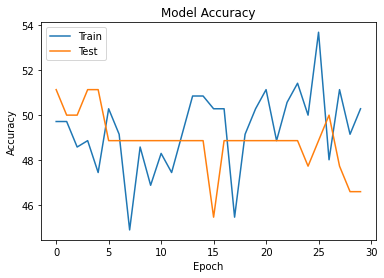

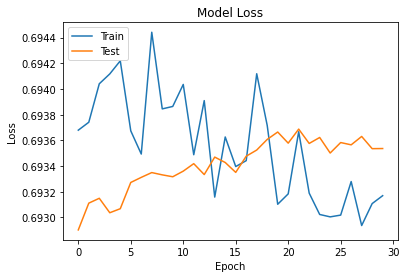

In [67]:
    # summarize history for accuracy
plt.plot(train_accs)
plt.plot(val_accs)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(train_losses)
plt.plot(val_losses)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [68]:
torch.save(model_state_dicts, "My-Model.pt")

# **INFERENCE**







In [69]:
def numericalize(text):
    
    numerialized_source = [] 
    numerialized_source = [dataset.source_vocab.stoi["<SOS>"]]
    numerialized_source += dataset.source_vocab.numericalize(text)
    numerialized_source.append(dataset.source_vocab.stoi["<EOS>"])
    
    return numerialized_source

def padding(source):
    padded_sequence = torch.zeros(config.MAX_LEN, 1, dtype = torch.int)
    source = torch.tensor(source)
    
    if len(source) > config.MAX_LEN:
        padded_sequence[:, 0] = source[: config.MAX_LEN]
    else:
        padded_sequence[:len(source), 0] = padded_sequence[:len(source), 0] + source
    
    return padded_sequence

In [70]:
def infer_processing(text):
    
    text = preprocessing(text)
    text = numericalize(text)
    text = padding(text)
    return text

In [71]:
aspects = ["phone", "camera", "battery", "neutral", "processor"]

def get_similarity(text, aspect):
    try:
#         text = " ".join(text)
        return fasttext_model.wv.similarity(text, aspect)
    except:
        return 0
    
def best_aspect(text, aspects):
    a = []
    
    for aspect in aspects:
        a.append(get_similarity(text, aspect))
    
    return aspects[np.argmax(a)]

In [72]:
sample = "I am really impressed with the phone's great battery backup."

ba = best_aspect(preprocessing(sample), aspects)

a = infer_processing(sample).to(config.DEVICE)

In [73]:
model.eval()
sentiment = model(a)
sentiment = sentiment.cpu().detach().numpy()[0]

if sentiment > 0.5:
    sentiment = 'Positively'
else :
    sentiment = 'Negatively'

In [74]:
print(f"The reviewer is talking {sentiment} about the {ba} of the phone in his/her comment")

The reviewer is talking Positively about the processor of the phone in his/her comment


# --------------------------------------------------------------------------------------------------------------------------